In [1]:
%matplotlib inline
%config InlineBackend.figure_formats = ['jpg']
import matplotlib
matplotlib.figure.Figure.__repr__ = lambda self: (
    f"<{self.__class__.__name__} size {self.bbox.size[0]:g}"
    f"x{self.bbox.size[1]:g} with {len(self.axes)} Axes>")

import matplotlib.pyplot as plt
import numpy as np
np.random.seed(42)
import pandas as pd
import scipy.cluster.hierarchy as sch
import scipy

In [2]:
from csv import DictReader

podatki = []
i = 0

readerRatings = DictReader(open('1502410S_20210405-145226.csv', 'rt'))
for row in readerRatings:
    if i != 0:
        podatki.append(row)
    else:
        imenaKrajev = row
    i += 1


imena = []
stevilke = []

for key in podatki:
    imena.append(key["Povprečni pridelek (t/ha) pomembnejših kmetijskih kultur"])
    stevilke.append(key[None])

for key in range(len(stevilke)):
    for i in range(len(stevilke[0])):
        if stevilke[key][i] == "-":
            stevilke[key][i] = 0
        
podatki = {}

for i in range(len(imena)):
    podatki[imena[i]] = stevilke[i]


imenaKrajev = imenaKrajev["Povprečni pridelek (t/ha) pomembnejših kmetijskih kultur"].split(",")  
df = pd.DataFrame(podatki)
df.index = imenaKrajev
df

,Pšenica in pira,Ječmen,Koruza za zrnje,Krompir,Buče za olje,Oljna ogrščica in repica,Hmelj,Belo zelje,Grozdje,Jabolka v intenzivnih sadovnjakih,Breskve in nektarine v intenzivnih sadovnjakih
"""2010 SLOVENIJA""",4.8,4.3,8.5,24.5,0.6,2.9,1.4,35.0,6.6,28.0,15.7
"""2010 Pomurska""",4.9,4.4,9.1,26.9,0.6,3.0,0,31.8,7.1,30.3,10.0
"""2010 Podravska""",5.0,4.6,8.7,24.4,0.6,2.9,0.4,28.6,5.5,24.8,10.1
"""2010 Koroška""",3.5,3.1,7.5,19.0,0.8,2.8,1.9,25.5,6.5,15.0,0
"""2010 Savinjska""",4.7,3.9,6.9,22.7,0.6,3.2,1.4,25.6,7.2,29.6,19.3
...,...,...,...,...,...,...,...,...,...,...,...
"""2019 Osrednjeslovenska""",4.8,4.8,6.7,24.5,0.7,2.0,0,35.2,6.5,23.7,15.4
"""2019 Gorenjska""",4.3,4.8,8.7,26.4,0.6,3.0,0,46.0,6.7,10.6,0
"""2019 Primorsko-notranjska""",4.5,4.6,7.9,22.8,0.6,2.9,0,39.0,6.7,23.7,15.4
"""2019 Goriška""",4.0,4.4,5.1,19.9,0.6,3.0,0,20.9,6.0,20.3,17.1


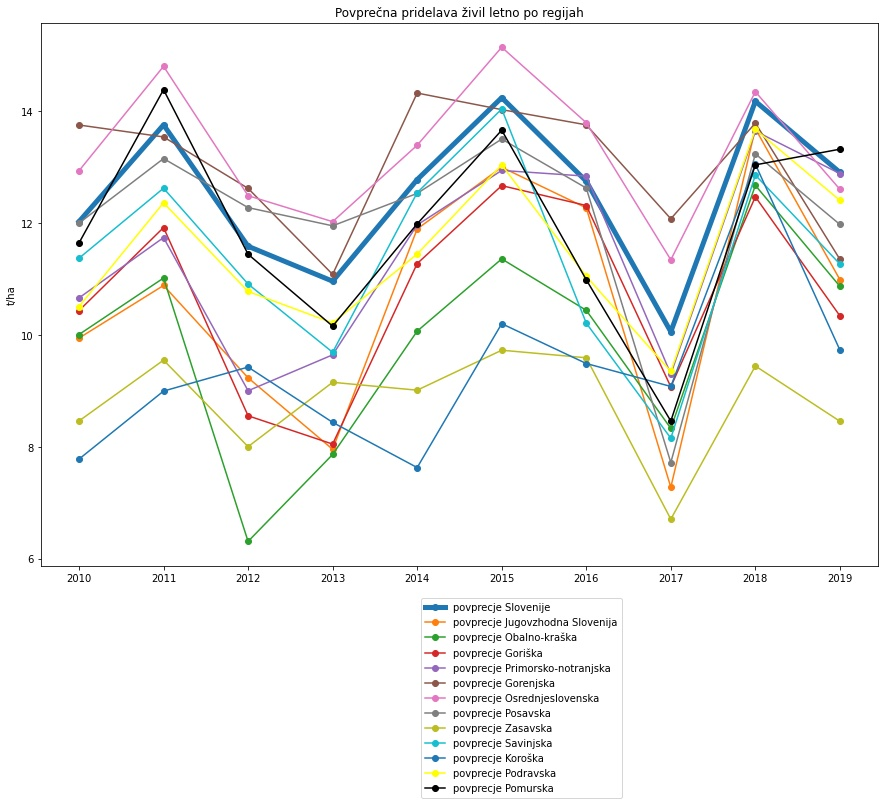

In [3]:
string = '"' + str(2010) + ' SLOVENIJA"'

povprecja = []
leta = 0
letnice = 2010

for i in range(2010, 2020, 1):
    
    string = '"' + str(letnice) + ' SLOVENIJA"'
    for i in range(len(df.loc[string])):
        leta += float(df.loc[string][i])

    leta = leta / len(df.loc[string])
    povprecja.append(leta)
    letnice += 1
x = [0,1,2,3,4,5,6,7,8,9]
y = [0,1,2,3,4,5,6,7,8,9,10,11,12,13]

plt.figure(figsize=(15,10))
plt.ylabel("t/ha")
plt.plot(povprecja, marker="o", label="povprecje Slovenije", linewidth=5)
plt.xticks(x,range(2010, 2020, 1))


povprecja = []
leta = 0
letnice = 2010

for i in range(2010, 2020, 1):
    
    string = '"' + str(letnice) + ' Jugovzhodna Slovenija"'
    for i in range(len(df.loc[string])):
        leta += float(df.loc[string][i])

    leta = leta / len(df.loc[string])
    povprecja.append(leta)
    letnice += 1


plt.plot(povprecja, marker="o", label="povprecje Jugovzhodna Slovenija")


povprecja = []
leta = 0
letnice = 2010

for i in range(2010, 2020, 1):
    
    string = '"' + str(letnice) + ' Obalno-kraška"'
    for i in range(len(df.loc[string])):
        leta += float(df.loc[string][i])

    leta = leta / len(df.loc[string])
    povprecja.append(leta)
    letnice += 1


plt.plot(povprecja, marker="o", label="povprecje Obalno-kraška")


povprecja = []
leta = 0
letnice = 2010

for i in range(2010, 2020, 1):
    
    string = '"' + str(letnice) + ' Goriška"'
    for i in range(len(df.loc[string])):
        leta += float(df.loc[string][i])

    leta = leta / len(df.loc[string])
    povprecja.append(leta)
    letnice += 1


plt.plot(povprecja, marker="o", label="povprecje Goriška")

povprecja = []
leta = 0
letnice = 2010

for i in range(2010, 2020, 1):
    
    string = '"' + str(letnice) + ' Primorsko-notranjska"'
    for i in range(len(df.loc[string])):
        leta += float(df.loc[string][i])

    leta = leta / len(df.loc[string])
    povprecja.append(leta)
    letnice += 1


plt.plot(povprecja, marker="o", label="povprecje Primorsko-notranjska")

povprecja = []
leta = 0
letnice = 2010

for i in range(2010, 2020, 1):
    
    string = '"' + str(letnice) + ' Gorenjska"'
    for i in range(len(df.loc[string])):
        leta += float(df.loc[string][i])

    leta = leta / len(df.loc[string])
    povprecja.append(leta)
    letnice += 1


plt.plot(povprecja, marker="o", label="povprecje Gorenjska")

povprecja = []
leta = 0
letnice = 2010

for i in range(2010, 2020, 1):
    
    string = '"' + str(letnice) + ' Osrednjeslovenska"'
    for i in range(len(df.loc[string])):
        leta += float(df.loc[string][i])

    leta = leta / len(df.loc[string])
    povprecja.append(leta)
    letnice += 1


plt.plot(povprecja, marker="o", label="povprecje Osrednjeslovenska")

povprecja = []
leta = 0
letnice = 2010

for i in range(2010, 2020, 1):
    
    string = '"' + str(letnice) + ' Posavska"'
    for i in range(len(df.loc[string])):
        leta += float(df.loc[string][i])

    leta = leta / len(df.loc[string])
    povprecja.append(leta)
    letnice += 1


plt.plot(povprecja, marker="o", label="povprecje Posavska")

povprecja = []
leta = 0
letnice = 2010

for i in range(2010, 2020, 1):
    
    string = '"' + str(letnice) + ' Zasavska"'
    for i in range(len(df.loc[string])):
        leta += float(df.loc[string][i])

    leta = leta / len(df.loc[string])
    povprecja.append(leta)
    letnice += 1


plt.plot(povprecja, marker="o", label="povprecje Zasavska")

povprecja = []
leta = 0
letnice = 2010

for i in range(2010, 2020, 1):
    
    string = '"' + str(letnice) + ' Savinjska"'
    for i in range(len(df.loc[string])):
        leta += float(df.loc[string][i])

    leta = leta / len(df.loc[string])
    povprecja.append(leta)
    letnice += 1


plt.plot(povprecja, marker="o", label="povprecje Savinjska")

povprecja = []
leta = 0
letnice = 2010

for i in range(2010, 2020, 1):
    
    string = '"' + str(letnice) + ' Koroška"'
    for i in range(len(df.loc[string])):
        leta += float(df.loc[string][i])

    leta = leta / len(df.loc[string])
    povprecja.append(leta)
    letnice += 1


plt.plot(povprecja, marker="o", label="povprecje Koroška")

povprecja = []
leta = 0
letnice = 2010

for i in range(2010, 2020, 1):
    
    string = '"' + str(letnice) + ' Podravska"'
    for i in range(len(df.loc[string])):
        leta += float(df.loc[string][i])

    leta = leta / len(df.loc[string])
    povprecja.append(leta)
    letnice += 1


plt.plot(povprecja, marker="o", label="povprecje Podravska", color="yellow")

povprecja = []
leta = 0
letnice = 2010

for i in range(2010, 2020, 1):
    
    string = '"' + str(letnice) + ' Pomurska"'
    for i in range(len(df.loc[string])):
        leta += float(df.loc[string][i])

    leta = leta / len(df.loc[string])
    povprecja.append(leta)
    letnice += 1


plt.plot(povprecja, marker="o", label="povprecje Pomurska", color="black")


plt.legend(bbox_to_anchor=(0.7, -0.05))
plt.title("Povprečna pridelava živil letno po regijah")
plt.show()


df = df.drop(labels=['"2010 SLOVENIJA"', '"2010 Pomurska"', '"2010 Podravska"', '"2010 Koroška"', '"2010 Savinjska"', '"2010 Zasavska"', '"2010 Posavska"', '"2010 Jugovzhodna Slovenija"', '"2010 Osrednjeslovenska"', '"2010 Gorenjska"', '"2010 Primorsko-notranjska"', '"2010 Goriška"', '"2010 Obalno-kraška"', '"2011 SLOVENIJA"', '"2011 Pomurska"', '"2011 Podravska"', '"2011 Koroška"', '"2011 Savinjska"', '"2011 Zasavska"', '"2011 Posavska"', '"2011 Jugovzhodna Slovenija"', '"2011 Osrednjeslovenska"', '"2011 Gorenjska"', '"2011 Primorsko-notranjska"', '"2011 Goriška"', '"2011 Obalno-kraška"', '"2012 SLOVENIJA"', '"2012 Pomurska"', '"2012 Podravska"', '"2012 Koroška"', '"2012 Savinjska"', '"2012 Zasavska"', '"2012 Posavska"', '"2012 Jugovzhodna Slovenija"', '"2012 Osrednjeslovenska"', '"2012 Gorenjska"', '"2012 Primorsko-notranjska"', '"2012 Goriška"', '"2012 Obalno-kraška"'], axis=0)

for i in range(0, 39):
    del imenaKrajev[0]


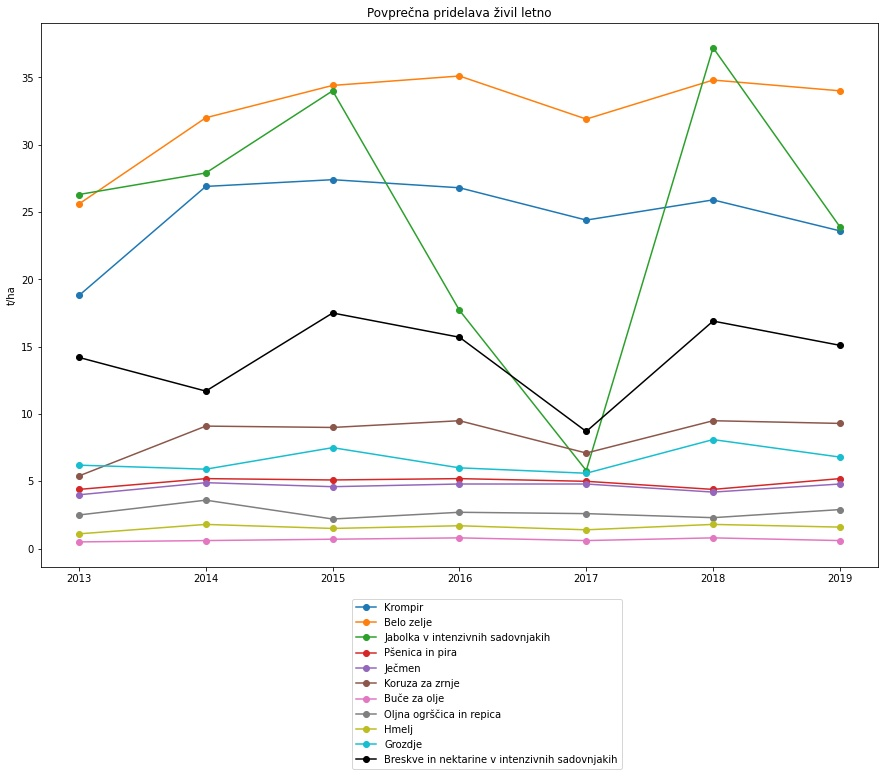

In [4]:

    


povprecja = []
steviloLetno = 0
letnice = 2013

for i in range(2013, 2020, 1):
    
    string = '"' + str(letnice) + ' SLOVENIJA"'
    steviloLetno = float(df.loc[string][3])
    povprecja.append(steviloLetno)
    letnice += 1

plt.figure(figsize=(15,10))
plt.plot(povprecja, marker="o", label="Krompir")
plt.ylabel("t/ha")
x = [0,1,2,3,4,5,6]
plt.xticks(x,range(2013, 2020, 1))

povprecja = []
steviloLetno = 0
letnice = 2013

for i in range(2013, 2020, 1):
    
    string = '"' + str(letnice) + ' SLOVENIJA"'
    steviloLetno = float(df.loc[string][7])
    povprecja.append(steviloLetno)
    letnice += 1


plt.plot(povprecja, marker="o", label="Belo zelje")

povprecja = []
steviloLetno = 0
letnice = 2013

for i in range(2013, 2020, 1):
    
    string = '"' + str(letnice) + ' SLOVENIJA"'
    steviloLetno = float(df.loc[string][9])
    povprecja.append(steviloLetno)
    letnice += 1


plt.plot(povprecja, marker="o", label="Jabolka v intenzivnih sadovnjakih")

povprecja = []
steviloLetno = 0
letnice = 2013

for i in range(2013, 2020, 1):
    
    string = '"' + str(letnice) + ' SLOVENIJA"'
    steviloLetno = float(df.loc[string][0])
    povprecja.append(steviloLetno)
    letnice += 1


plt.plot(povprecja, marker="o", label="Pšenica in pira")

povprecja = []
steviloLetno = 0
letnice = 2013

for i in range(2013, 2020, 1):
    
    string = '"' + str(letnice) + ' SLOVENIJA"'
    steviloLetno = float(df.loc[string][1])
    povprecja.append(steviloLetno)
    letnice += 1


plt.plot(povprecja, marker="o", label="Ječmen")

povprecja = []
steviloLetno = 0
letnice = 2013

for i in range(2013, 2020, 1):
    
    string = '"' + str(letnice) + ' SLOVENIJA"'
    steviloLetno = float(df.loc[string][2])
    povprecja.append(steviloLetno)
    letnice += 1


plt.plot(povprecja, marker="o", label="Koruza za zrnje")

povprecja = []
steviloLetno = 0
letnice = 2013

for i in range(2013, 2020, 1):
    
    string = '"' + str(letnice) + ' SLOVENIJA"'
    steviloLetno = float(df.loc[string][4])
    povprecja.append(steviloLetno)
    letnice += 1


plt.plot(povprecja, marker="o", label="Buče za olje")

povprecja = []
steviloLetno = 0
letnice = 2013

for i in range(2013, 2020, 1):
    
    string = '"' + str(letnice) + ' SLOVENIJA"'
    steviloLetno = float(df.loc[string][5])
    povprecja.append(steviloLetno)
    letnice += 1


plt.plot(povprecja, marker="o", label="Oljna ogrščica in repica")

povprecja = []
steviloLetno = 0
letnice = 2013

for i in range(2013, 2020, 1):
    
    string = '"' + str(letnice) + ' SLOVENIJA"'
    steviloLetno = float(df.loc[string][6])
    povprecja.append(steviloLetno)
    letnice += 1


plt.plot(povprecja, marker="o", label="Hmelj")

povprecja = []
steviloLetno = 0
letnice = 2013

for i in range(2013, 2020, 1):
    
    string = '"' + str(letnice) + ' SLOVENIJA"'
    steviloLetno = float(df.loc[string][8])
    povprecja.append(steviloLetno)
    letnice += 1


plt.plot(povprecja, marker="o", label="Grozdje")

povprecja = []
steviloLetno = 0
letnice = 2013

for i in range(2013, 2020, 1):
    
    string = '"' + str(letnice) + ' SLOVENIJA"'
    steviloLetno = float(df.loc[string][10])
    povprecja.append(steviloLetno)
    letnice += 1


plt.plot(povprecja, marker="o", label="Breskve in nektarine v intenzivnih sadovnjakih", color="black")
plt.legend(bbox_to_anchor=(0.7, -0.05))
plt.title("Povprečna pridelava živil letno")
plt.show()

In [5]:
prices = DictReader(open('1505000S.csv', 'rt'))

cene = []
i = 0
letaCene = []
for row in prices:
    if i != 0:
        cene.append(row)
    else:
        letaCene = row
    i += 1
    
imenaCene = []
stevilkeCene = []

for key in cene:
    imenaCene.append(key["Quantities and average prices of purchased agricultural products"])
    stevilkeCene.append(key[None])
    
cene = {}


for i in range(len(imenaCene)):
    cene[imenaCene[i]] = stevilkeCene[i]

letaCene = letaCene["Quantities and average prices of purchased agricultural products"].split(",")  
dfCene = pd.DataFrame(cene)
dfCene.index = letaCene

for i in range(len(dfCene["Pšenica in pira"].values)):
    dfCene["Pšenica in pira"].values[i] = float(dfCene["Pšenica in pira"].values[i]) / 1000
    
for i in range(len(dfCene["Ječmen"].values)):
    dfCene["Ječmen"].values[i] = float(dfCene["Ječmen"].values[i]) / 1000

for i in range(len(dfCene["Koruza za zrnje"].values)):
    dfCene["Koruza za zrnje"].values[i] = float(dfCene["Koruza za zrnje"].values[i]) / 1000
dfCene

,Pšenica in pira,Ječmen,Koruza za zrnje,Oljna ogrščica in repica,Hmelj,Buče za olje,Krompir,Belo zelje,Jabolka v intenzivnih sadovnjakih,Breskve in nektarine v intenzivnih sadovnjakih,Grozdje
"""2013 Quantity""",64.573,5.479,42.61,9246462,1127956,115881,2385539,1000133,13434780,125907,15233492
"""2013 Average price (EUR)""",0.18097,0.17726,0.16923,0.36,3.38,2.83,0.33,0.31,0.58,1.05,0.46
"""2014 Quantity""",82.178,6.429,84.358,8957376,1327967,97334,3132009,1576220,19903796,141162,14393936
"""2014 Average price (EUR)""",0.16909,0.15331,0.12528,0.31,4.62,3.38,0.16,0.24,0.41,0.80,0.46
"""2015 Quantity""",74.42,10.559,83.852,3594753,881918,191816,3919129,1533331,21611825,157207,15287724
"""2015 Average price (EUR)""",0.16833,0.13378,0.13177,0.36,5.62,3.77,0.13,0.25,0.46,0.74,0.50
"""2016 Quantity""",50.035,9.81,81.658,6451522,1197720,321398,3277887,1965166,17006379,164808,12309570
"""2016 Average price (EUR)""",0.13381,0.13295,0.13061,0.33,6.61,2.96,0.16,0.24,0.49,0.75,0.55
"""2017 Quantity""",84.367,14.312,79.221,5414088,1449230,346269,4301925,2280072,5800976,102915,17004972
"""2017 Average price (EUR)""",0.15397,0.12876,0.14125,0.32,6.20,2.43,0.18,0.25,0.63,0.89,0.60


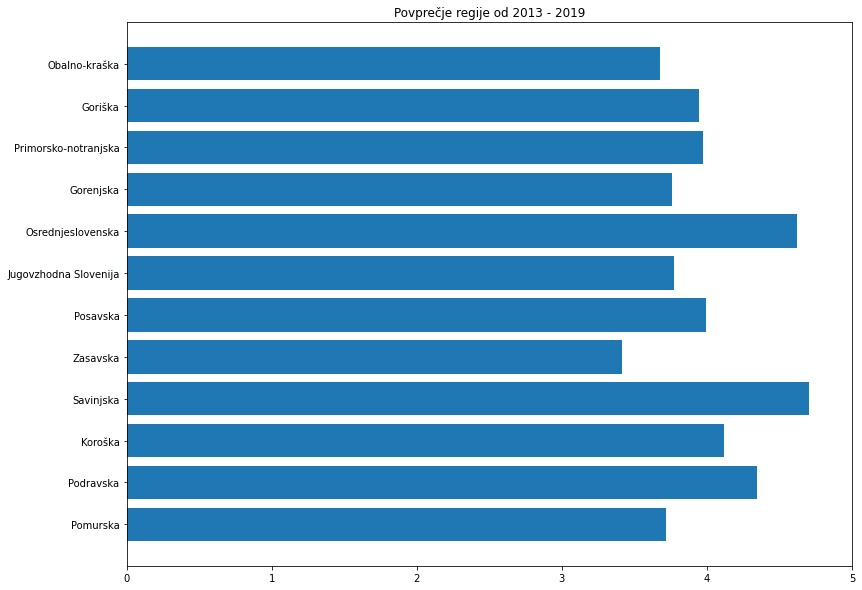

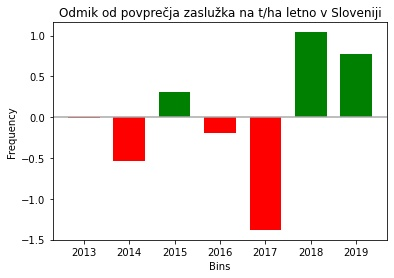

In [6]:
Average_price = {}
cene_po_panogah = []
flag = 0
for x in dfCene.index:
    if flag%2!=0:
        x = x.split()[0]
        Average_price[x] = {}
        for y in dfCene.columns:
            Average_price[x][y] = 0
    flag+=1
flag = 0
poljeSt = 0
poljestV = 0
for c in dfCene.values:
    if flag%2!=0:
        cene_po_panogah.append(c)
    flag+=1    

for a1 in Average_price.keys():
    for a2 in Average_price[a1].keys():
        Average_price[a1][a2]=cene_po_panogah[poljeSt][poljestV]
        poljestV+=1
    poljestV=0
    poljeSt+=1

regije = {'SLOVENIJA': {"2013": {}, "2014": {},"2015": {},"2016": {},"2017": {},"2018": {},"2019": {}}, 'Pomurska': {"2013": {}, "2014": {},"2015": {},"2016": {},"2017": {},"2018": {},"2019": {}}, 'Podravska': {"2013": {}, "2014": {},"2015": {},"2016": {},"2017": {},"2018": {},"2019": {}}, 'Koroška': {"2013": {}, "2014": {},"2015": {},"2016": {},"2017": {},"2018": {},"2019": {}}, 'Savinjska': {"2013": {}, "2014": {},"2015": {},"2016": {},"2017": {},"2018": {},"2019": {}}, 'Zasavska': {"2013": {}, "2014": {},"2015": {},"2016": {},"2017": {},"2018": {},"2019": {}}, 'Posavska': {"2013": {}, "2014": {},"2015": {},"2016": {},"2017": {},"2018": {},"2019": {}}, 'Jugovzhodna Slovenija': {"2013": {}, "2014": {},"2015": {},"2016": {},"2017": {},"2018": {},"2019": {}}, 'Osrednjeslovenska': {"2013": {}, "2014": {},"2015": {},"2016": {},"2017": {},"2018": {},"2019": {}}, 'Gorenjska': {"2013": {}, "2014": {},"2015": {},"2016": {},"2017": {},"2018": {},"2019": {}}, 'Primorsko-notranjska': {"2013": {}, "2014": {},"2015": {},"2016": {},"2017": {},"2018": {},"2019": {}}, 'Goriška': {"2013": {}, "2014": {},"2015": {},"2016": {},"2017": {},"2018": {},"2019": {}}, 'Obalno-kraška': {"2013": {}, "2014": {},"2015": {},"2016": {},"2017": {},"2018": {},"2019": {}}}

for key in regije:
    for i in regije[key]:
        for j in range(len(df.loc['"' + str(i) + " " + str(key) + '"'])):
            regije[key][i][df.loc['"' + str(i) + " " + str(key) + '"'].keys()[j]] = df.loc['"' + str(i) + " " + str(key) + '"'][j]
            
regijePovprecno = {}
            
for key in regije:
    regijePovprecno[key] = {}
    for i in regije[key]:
        avg = 0
        for j in regije[key][i]:
            avg += (float(regije[key][i][j]) * float(Average_price['"' + str(i)][j]))
        avg = avg / len(regije[key][i])
        regijePovprecno[key][i] = avg
        

regijeCenaPovprecno = {}

for key in regijePovprecno:
    avg = 0
    for i in regijePovprecno[key]:
        avg += regijePovprecno[key][i]
    avg = avg / len(regijePovprecno[key])
    regijeCenaPovprecno[key] = avg
    
fig, ax = plt.subplots(figsize=(13,10))


podatki = {}

for key in regijeCenaPovprecno:
    if key != "SLOVENIJA":
        podatki[key] = regijeCenaPovprecno[key]
        
x = np.arange(len(podatki))
ax.barh(x, podatki.values())
ax.set_yticks(x)
plt.title("Povprečje regije od 2013 - 2019")
ax.set_yticklabels(podatki.keys())
ax.set_xticks(np.arange(6))
ax.set_xticklabels(range(0,6))

plt.show()

a=[regijePovprecno["SLOVENIJA"][key] for key in regijePovprecno["SLOVENIJA"]]
av = sum(a)/len(a)



for i in range(len(a)):
    a[i] = a[i] - av

povprecje = 0
idx=np.array([2013,2014,2015,2016,2017,2018,2019])
barve = ['green' if (x > 0) else 'red' for x in a ]
plt.bar(idx, a, color=barve, width=0.7, alpha = 1)
plt.xlabel('Bins')
plt.title("Odmik od povprečja zaslužka na t/ha letno v Sloveniji")
plt.ylabel('Frequency')
plt.axhline(y=0, color='darkgray', linestyle='-')

plt.show()

[('Ječmen', 0.655495), ('Pšenica in pira', 0.7927790000000001), ('Oljna ogrščica in repica', 0.8817142857142857), ('Koruza za zrnje', 1.1471581428571427), ('Buče za olje', 1.8785714285714286), ('Grozdje', 3.524714285714286), ('Krompir', 4.967714285714286), ('Belo zelje', 8.993571428571428), ('Hmelj', 9.25357142857143), ('Jabolka v intenzivnih sadovnjakih', 11.554142857142855), ('Breskve in nektarine v intenzivnih sadovnjakih', 12.023)]


[Text(0, 0, '0'),
 Text(1, 0, '1'),
 Text(2, 0, '2'),
 Text(3, 0, '3'),
 Text(4, 0, '4'),
 Text(5, 0, '5'),
 Text(6, 0, '6'),
 Text(7, 0, '7'),
 Text(8, 0, '8'),
 Text(9, 0, '9'),
 Text(10, 0, '10'),
 Text(11, 0, '11'),
 Text(12, 0, '12')]

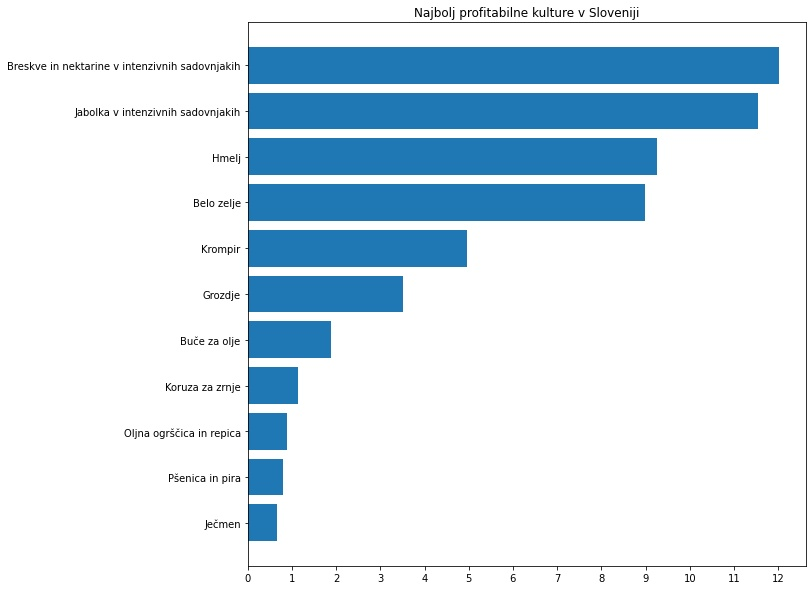

In [7]:
profitablineKulture = {}
for j in range(11):
    povprecja = 0
    letnice = 2013
    for i in range(2013, 2020, 1):
        string = '"' + str(letnice) + ' SLOVENIJA"'
        povprecja += float(df.loc[string][j]) * float(Average_price['"' + str(letnice)][df.loc[string].keys()[j]])
        letnice += 1
    povprecja /= 7
    profitablineKulture[df.loc[string].keys()[j]] = povprecja   
    
profitablineKulture = sorted(profitablineKulture.items(), key=lambda item: item[1], reverse=False) 
podatki = {}
for key in profitablineKulture:
    podatki[key[0]] = key[1] 
print(profitablineKulture)
fig, ax = plt.subplots(figsize=(10,10))

x = np.arange(len(podatki))
ax.barh(x, podatki.values())
ax.set_yticks(x)
plt.title("Najbolj profitabilne kulture v Sloveniji")
ax.set_yticklabels(podatki.keys())
ax.set_xticks(np.arange(13))
ax.set_xticklabels(range(0,13))

In [8]:
cenaNaKulturo = {}

for key in regije:
    cenaNaKulturo[key] = {}
    for i in regije[key]:
        cenaNaKulturo[key][i] = {}
        for j in regije[key][i]:
            cenaNaKulturo[key][i][j] = float(regije[key][i][j]) * float(Average_price['"' + str(i)][j])



pridelavaRegije = {}

for key in regije:
    for i in regije[key]:
        for j in regije[key][i]:
            if j not in pridelavaRegije:
                pridelavaRegije[j] = {}
                pridelavaRegije[j][key] = float(regije[key][i][j])
            else:
                if key not in pridelavaRegije[j]:
                    pridelavaRegije[j][key] = float(regije[key][i][j])
                else:
                    pridelavaRegije[j][key] += float(regije[key][i][j])
            
for key in pridelavaRegije:
    for i in pridelavaRegije[key]:
        pridelavaRegije[key][i] = round(round(pridelavaRegije[key][i], 1) / 7, 1)
        

primernaObmocjaSajenja = {}


for key in pridelavaRegije:
    primernaObmocjaSajenja[key] = max(pridelavaRegije[key], key=pridelavaRegije[key].get)
print("Najbolj primerne regije za vsako kulturo:")   
for key in primernaObmocjaSajenja:       
    print( key + " : " + primernaObmocjaSajenja[key])

Najbolj primerne regije za vsako kulturo:
Pšenica in pira : Podravska
Ječmen : Gorenjska
Koruza za zrnje : Pomurska
Krompir : Gorenjska
Buče za olje : Savinjska
Oljna ogrščica in repica : Podravska
Hmelj : Koroška
Belo zelje : Gorenjska
Grozdje : Posavska
Jabolka v intenzivnih sadovnjakih : Posavska
Breskve in nektarine v intenzivnih sadovnjakih : Goriška


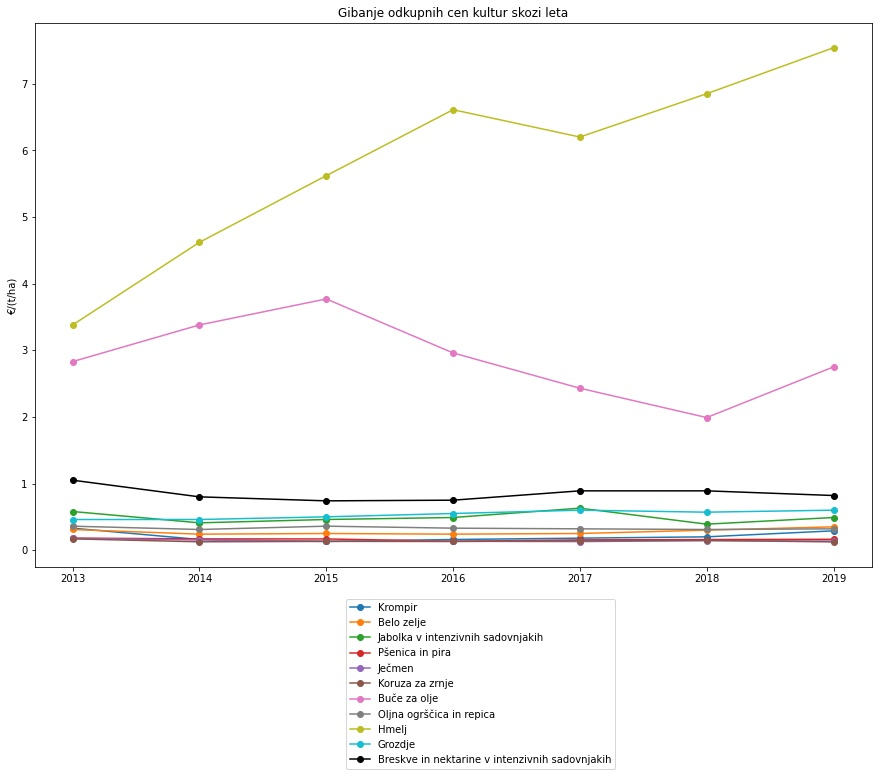

In [18]:
povprecja = []
steviloLetno = 0
letnice = 2013

for i in range(2013, 2020, 1):    
    string = '"' + str(letnice)
    steviloLetno = float(Average_price[string]["Krompir"])
    povprecja.append(steviloLetno)
    letnice += 1

plt.figure(figsize=(15,10))
plt.plot(povprecja, marker="o", label="Krompir")
plt.ylabel("€/(t/ha)")
x = [0,1,2,3,4,5,6]
plt.xticks(x,range(2013, 2020, 1))

povprecja = []
steviloLetno = 0
letnice = 2013

for i in range(2013, 2020, 1):
    
    string = '"' + str(letnice)
    steviloLetno = float(Average_price[string]["Belo zelje"])
    povprecja.append(steviloLetno)
    letnice += 1


plt.plot(povprecja, marker="o", label="Belo zelje")

povprecja = []
steviloLetno = 0
letnice = 2013

for i in range(2013, 2020, 1):
    
    string = '"' + str(letnice)
    steviloLetno = float(Average_price[string]["Jabolka v intenzivnih sadovnjakih"])
    povprecja.append(steviloLetno)
    letnice += 1


plt.plot(povprecja, marker="o", label="Jabolka v intenzivnih sadovnjakih")

povprecja = []
steviloLetno = 0
letnice = 2013

for i in range(2013, 2020, 1):
    
    string = '"' + str(letnice)
    steviloLetno = float(Average_price[string]["Pšenica in pira"])
    povprecja.append(steviloLetno)
    letnice += 1


plt.plot(povprecja, marker="o", label="Pšenica in pira")

povprecja = []
steviloLetno = 0
letnice = 2013

for i in range(2013, 2020, 1):
    
    string = '"' + str(letnice)
    steviloLetno = float(Average_price[string]["Ječmen"])
    povprecja.append(steviloLetno)
    letnice += 1


plt.plot(povprecja, marker="o", label="Ječmen")

povprecja = []
steviloLetno = 0
letnice = 2013

for i in range(2013, 2020, 1):
    string = '"' + str(letnice)
    steviloLetno = float(Average_price[string]["Koruza za zrnje"])
    povprecja.append(steviloLetno)
    letnice += 1


plt.plot(povprecja, marker="o", label="Koruza za zrnje")

povprecja = []
steviloLetno = 0
letnice = 2013

for i in range(2013, 2020, 1):
    
    string = '"' + str(letnice)
    steviloLetno = float(Average_price[string]["Buče za olje"])
    povprecja.append(steviloLetno)
    letnice += 1


plt.plot(povprecja, marker="o", label="Buče za olje")

povprecja = []
steviloLetno = 0
letnice = 2013

for i in range(2013, 2020, 1):
    
    string = '"' + str(letnice)
    steviloLetno = float(Average_price[string]["Oljna ogrščica in repica"])
    povprecja.append(steviloLetno)
    letnice += 1


plt.plot(povprecja, marker="o", label="Oljna ogrščica in repica")

povprecja = []
steviloLetno = 0
letnice = 2013

for i in range(2013, 2020, 1):
    
    string = '"' + str(letnice)
    steviloLetno = float(Average_price[string]["Hmelj"])
    povprecja.append(steviloLetno)
    letnice += 1


plt.plot(povprecja, marker="o", label="Hmelj")

povprecja = []
steviloLetno = 0
letnice = 2013

for i in range(2013, 2020, 1):
    
    string = '"' + str(letnice)
    steviloLetno = float(Average_price[string]["Grozdje"])
    povprecja.append(steviloLetno)
    letnice += 1


plt.plot(povprecja, marker="o", label="Grozdje")

povprecja = []
steviloLetno = 0
letnice = 2013

for i in range(2013, 2020, 1):
    
    string = '"' + str(letnice)
    steviloLetno = float(Average_price[string]["Breskve in nektarine v intenzivnih sadovnjakih"])
    povprecja.append(steviloLetno)
    letnice += 1


plt.plot(povprecja, marker="o", label="Breskve in nektarine v intenzivnih sadovnjakih", color="black")
plt.legend(bbox_to_anchor=(0.7, -0.05))
plt.title("Gibanje odkupnih cen kultur skozi leta")
plt.show()